In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [47]:
history_df = pd.read_csv("../data/Coca-Cola_stock_history.csv")
info_df = pd.read_csv("../data/Coca-Cola_stock_info.csv")

history_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [48]:
history_df.shape


(15311, 8)

In [49]:
history_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 897.2+ KB


In [50]:
history_df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,15311.000000,15311.000000,15311.000000,15311.000000,1.531100e+04,15311.000000,15311.000000
mean,11.812883,11.906708,11.717375,11.815409,9.139213e+06,0.001678,0.001110
std,15.025726,15.133336,14.915580,15.026316,7.957947e+06,0.021302,0.049148
min,0.037154,0.037279,0.034890,0.037028,7.680000e+04,0.000000,0.000000
25%,0.238453,0.240305,0.236415,0.238312,2.889600e+06,0.000000,0.000000
50%,4.935146,4.980985,4.884242,4.937339,7.708800e+06,0.000000,0.000000
75%,17.383926,17.612844,17.168283,17.415106,1.307130e+07,0.000000,0.000000
max,66.037933,66.235058,64.776308,65.259270,1.241690e+08,0.440000,3.000000


In [51]:
history_df['Date'] = pd.to_datetime(history_df['Date'], errors='coerce')


In [52]:
history_df.isnull().sum()


Date            8840
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
dtype: int64

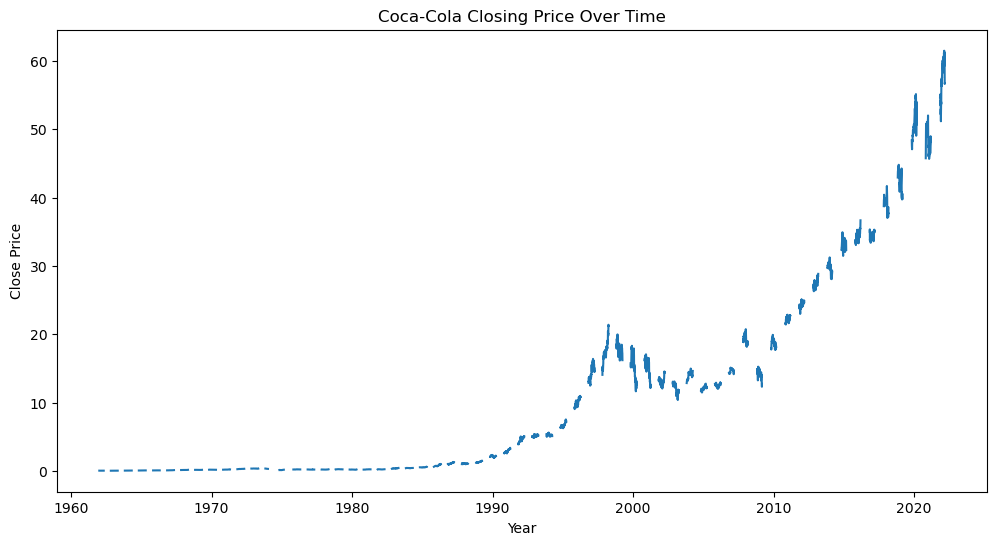

In [53]:
plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'])
plt.title("Coca-Cola Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()


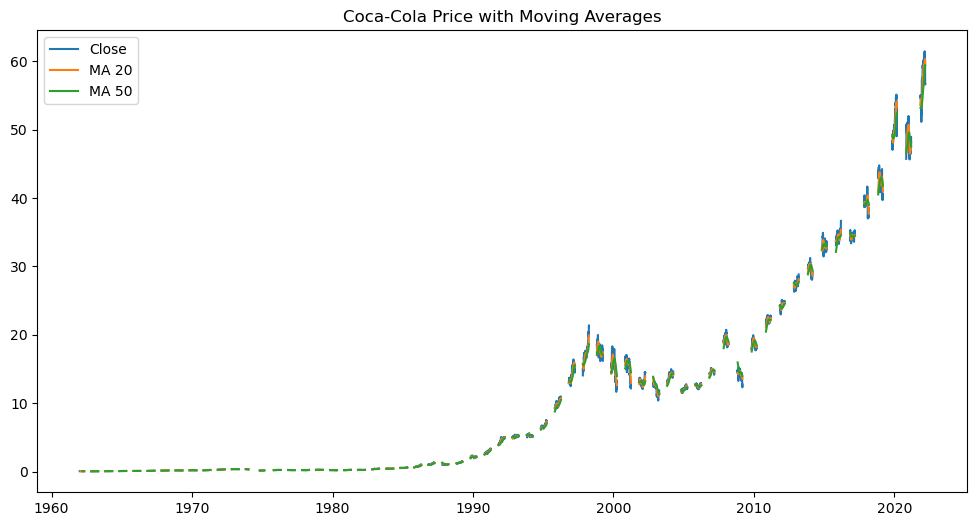

In [54]:
history_df['MA_20'] = history_df['Close'].rolling(20).mean()
history_df['MA_50'] = history_df['Close'].rolling(50).mean()

plt.figure(figsize=(12,6))
plt.plot(history_df['Date'], history_df['Close'], label="Close")
plt.plot(history_df['Date'], history_df['MA_20'], label="MA 20")
plt.plot(history_df['Date'], history_df['MA_50'], label="MA 50")
plt.legend()
plt.title("Coca-Cola Price with Moving Averages")
plt.show()


In [55]:
history_df['Daily_Return'] = history_df['Close'].pct_change()
history_df[['Date', 'Daily_Return']].head()


,Date,Daily_Return
0,1962-01-02,NaN
1,1962-01-03,-0.022280
2,1962-01-04,0.007598
3,1962-01-05,-0.022616
4,1962-01-08,-0.010282


In [56]:
history_df['Volatility'] = history_df['Daily_Return'].rolling(20).std()
history_df[['Date', 'Volatility']].head()


,Date,Volatility
0,1962-01-02,NaN
1,1962-01-03,NaN
2,1962-01-04,NaN
3,1962-01-05,NaN
4,1962-01-08,NaN


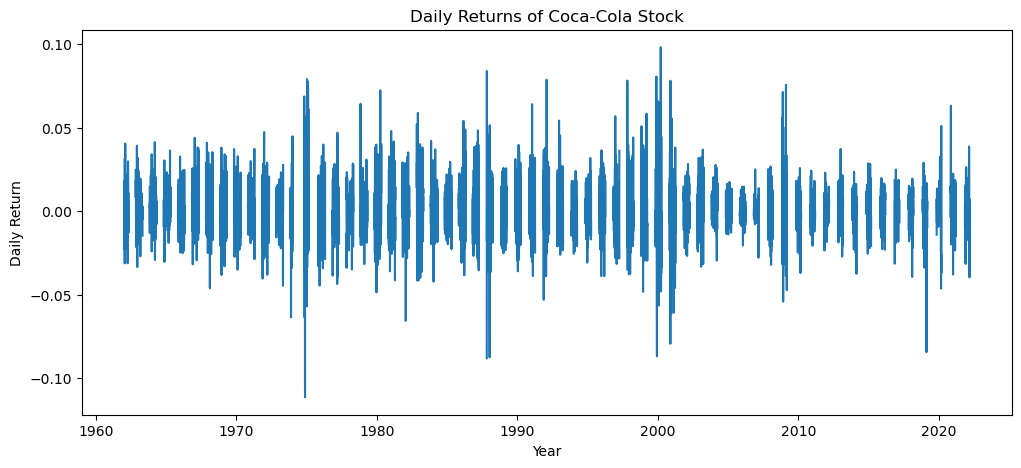

In [57]:
plt.figure(figsize=(12,5))
plt.plot(history_df['Date'], history_df['Daily_Return'])
plt.title("Daily Returns of Coca-Cola Stock")
plt.xlabel("Year")
plt.ylabel("Daily Return")
plt.show()


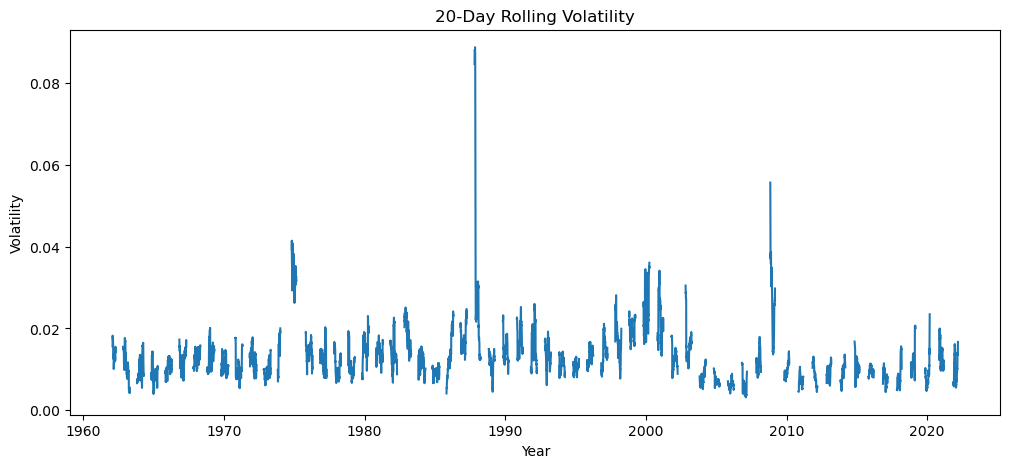

In [58]:
plt.figure(figsize=(12,5))
plt.plot(history_df['Date'], history_df['Volatility'])
plt.title("20-Day Rolling Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()


In [59]:
from sklearn.model_selection import train_test_split
data = history_df
features = [
    'Open', 'High', 'Low', 'Volume',
    'Dividends', 'Stock Splits',
    'MA_20', 'MA_50',
    'Daily_Return', 'Volatility'
]

target = 'Close'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

print(X_train.shape, X_test.shape)


(12248, 10) (3063, 10)


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE : 14.625112837676458
RMSE: 18.084942247314952
R2 Score: -1.8322653172115588


In [61]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by='Importance',
    ascending=False
)

feature_importance




,Feature,Importance
1,High,2.552753e-01
7,MA_50,2.258518e-01
2,Low,1.932631e-01
6,MA_20,1.808237e-01
0,Open,1.447352e-01
8,Daily_Return,4.230632e-05
9,Volatility,4.356169e-06
3,Volume,4.177563e-06
4,Dividends,6.232453e-08
5,Stock Splits,4.789327e-10


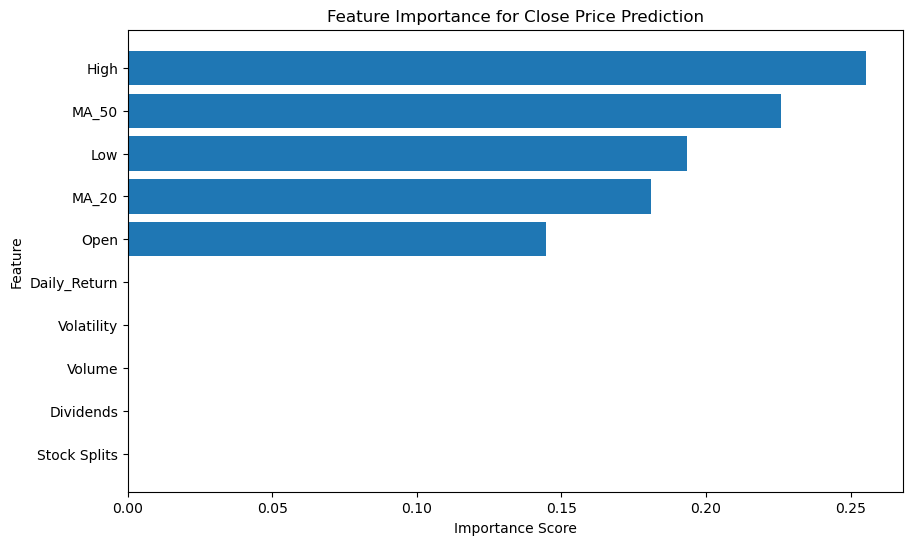

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Importance']
)
plt.gca().invert_yaxis()
plt.title("Feature Importance for Close Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


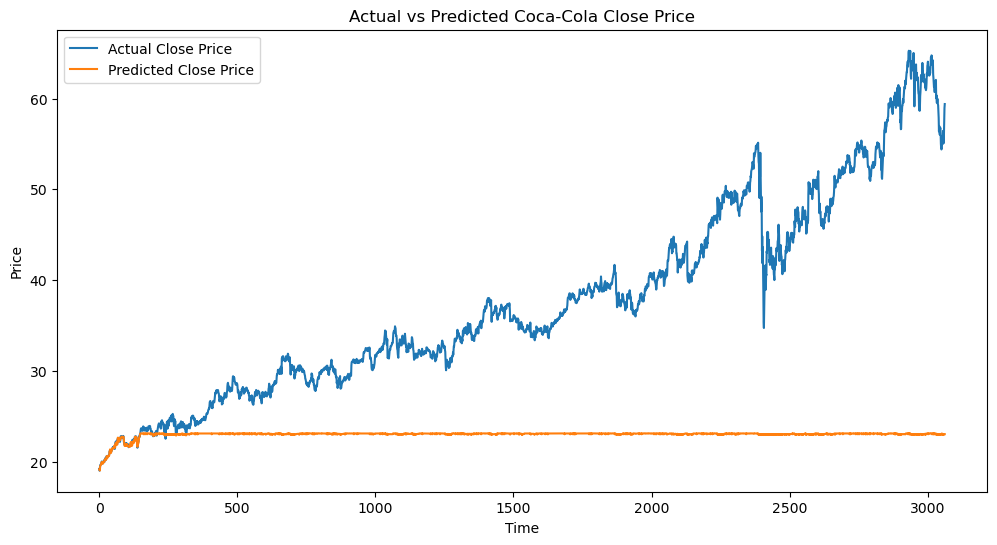

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title("Actual vs Predicted Coca-Cola Close Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


## Final Conclusion

In this project, I performed an end-to-end analysis of Coca-Cola stock price data.
I conducted data cleaning and exploratory data analysis to understand long-term trends and volatility.
Using engineered features such as moving averages, daily returns, and volatility, I trained a Random Forest regression model to predict closing prices.

The model was able to capture the overall trend in stock prices, though short-term fluctuations during high volatility periods were more challenging.
Feature importance analysis showed that moving averages and price range features had the highest influence on predictions.

This project strengthened my understanding of time-series data, feature engineering, and machine learning model evaluation using Python.
